In [1]:
import pandas as pd
import matplotlib.pyplot as plt
terremoto='bronze.csv'
df = pd.read_csv(terremoto)
descricao = df.describe()
print(descricao)

            latitude      longitude          depth            mag  \
count  797046.000000  797046.000000  797041.000000  797046.000000   
mean       19.038314     -12.911692      53.726903       3.884296   
std        29.219884     118.010192      99.510254       0.911611   
min       -84.422000    -179.999000      -4.900000       2.500000   
25%        -4.727000    -118.086000      10.000000       3.000000   
50%        29.826000     -52.385000      23.000000       4.000000   
75%        39.405000     120.892000      45.620000       4.600000   
max        87.221000     180.000000     735.800000       9.500000   

                 nst            gap           dmin            rms  place  \
count  421658.000000  470629.000000  202838.000000  614095.000000    0.0   
mean       33.170883     141.002356       1.757801       0.763249    NaN   
std        55.796692      81.447357       3.734481       0.477974    NaN   
min         0.000000       0.000000       0.000000       0.000000    NaN  

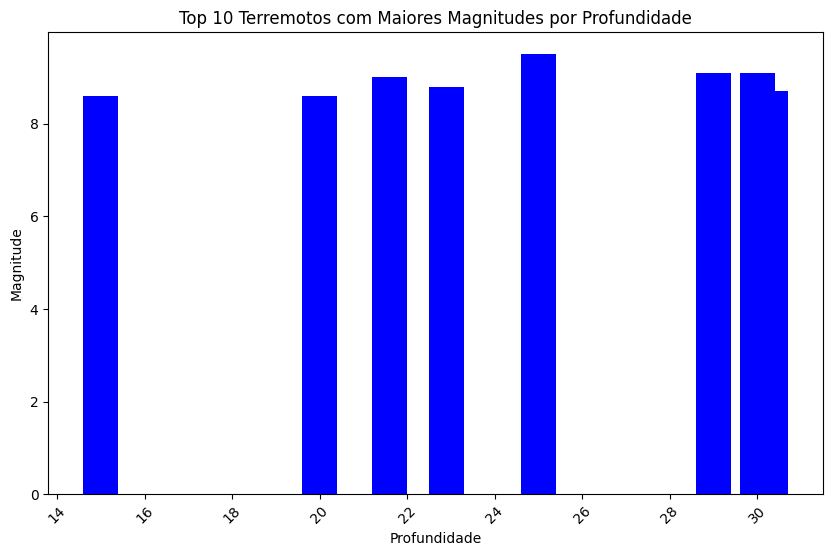

In [10]:
# Filtrar os dados para remover linhas com valores nulos em 'depth' e 'mag'
df_filtrado = df.dropna(subset=['depth', 'mag'])

# Ordenar o Data pelo valor de 'mag' em ordem decrescente
df_filtrado = df_filtrado.sort_values(by='mag', ascending=False)

# Selecionar os 10 maiores mag
top_10 = df_filtrado.head(10)

# Criador um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10['depth'], top_10['mag'], color='blue')
plt.xlabel('Profundidade')
plt.ylabel('Magnitude')
plt.title('Top 10 Terremotos com Maiores Magnitudes por Profundidade')
plt.xticks(rotation=45)
plt.show()

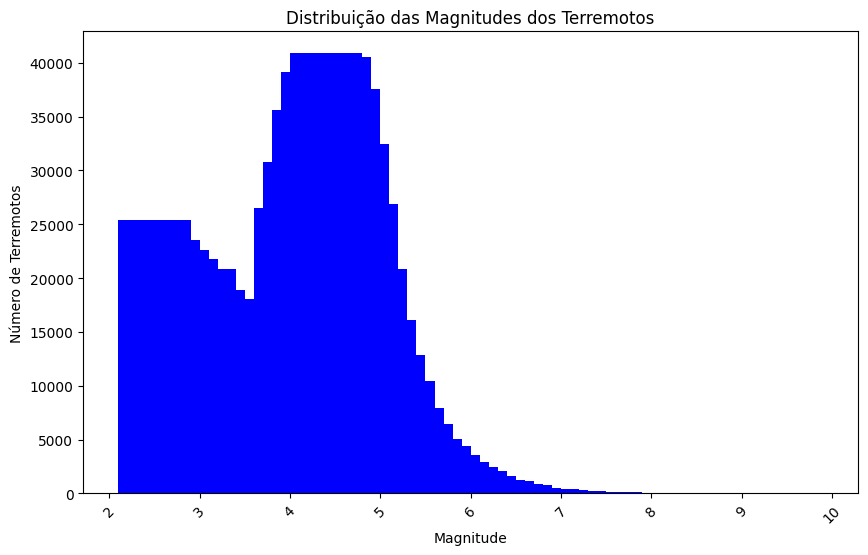

In [9]:
# Filtrar os dados para remover linhas com valores nulos em 'mag'
df_filtrado_mag = df.dropna(subset=['mag'])

# Contar o número de terremotos para cada magnitude
contagem_magnitudes = df_filtrado_mag['mag'].value_counts().sort_index()

# Criar um gráfico de barras para a contagem de magnitudes
plt.figure(figsize=(10, 6))
plt.bar(contagem_magnitudes.index, contagem_magnitudes.values, color='blue')
plt.xlabel('Magnitude')
plt.ylabel('Número de Terremotos')
plt.title('Distribuição das Magnitudes dos Terremotos')
plt.xticks(rotation=45)
plt.show()

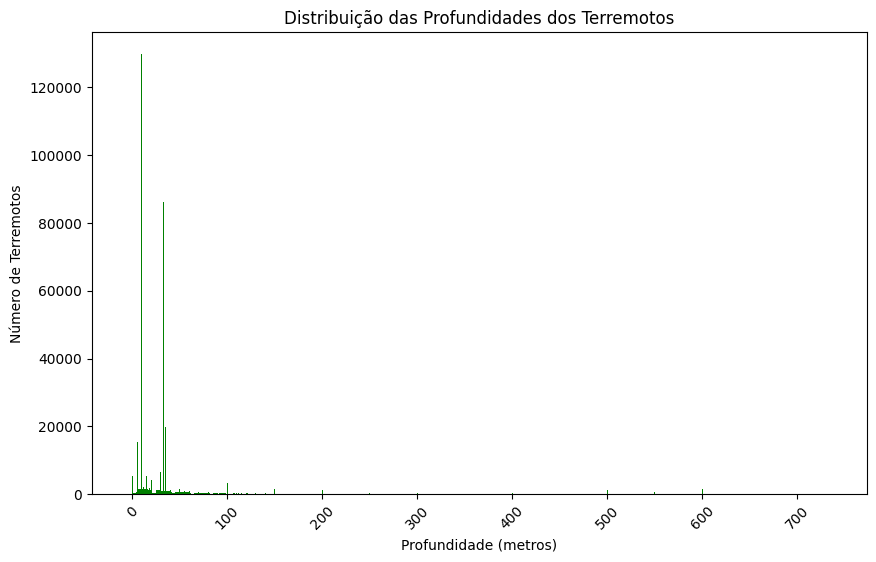

In [8]:
# Filtrar os dados para remover linhas com valores nulos em 'depth'
df_filtrado_depth = df.dropna(subset=['depth'])

# Contar o número de terremotos para cada profundidade
contagem_profundidades = df_filtrado_depth['depth'].value_counts().sort_index()

# Criar um gráfico de barras para a contagem de profundidades
plt.figure(figsize=(10, 6))
plt.bar(contagem_profundidades.index, contagem_profundidades.values, color='green')
plt.xlabel('Profundidade (metros)')
plt.ylabel('Número de Terremotos')
plt.title('Distribuição das Profundidades dos Terremotos')
plt.xticks(rotation=45)
plt.show()

In [3]:
informacoes = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797046 entries, 0 to 797045
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             797046 non-null  object 
 1   latitude         797046 non-null  float64
 2   longitude        797046 non-null  float64
 3   depth            797041 non-null  float64
 4   mag              797046 non-null  float64
 5   magType          796940 non-null  object 
 6   nst              421658 non-null  float64
 7   gap              470629 non-null  float64
 8   dmin             202838 non-null  float64
 9   rms              614095 non-null  float64
 10  net              797046 non-null  object 
 11  id               797046 non-null  object 
 12  updated          797046 non-null  object 
 13  place            0 non-null       float64
 14  type             0 non-null       float64
 15  horizontalError  0 non-null       float64
 16  depthError       0 non-null       floa

In [4]:
#Correlação
correlacao = df['depth'].corr(df['mag'])
print(correlacao)

0.2322686800342416


In [5]:
# Estatísticas específicas para a coluna 'magnitude'
contagem_magnitudes = df['mag'].describe()

# Estatísticas específicas para a coluna 'depth'
contagem_profundidades  = df['depth'].describe()

# Exibir as estatísticas para 'magnitude'
print("Estatísticas para Magnitude:")
print(contagem_magnitudes)

# Exibir as estatísticas para 'depth'
print("\nEstatísticas para Profundidade:")
print(contagem_profundidades )

Estatísticas para Magnitude:
count    797046.000000
mean          3.884296
std           0.911611
min           2.500000
25%           3.000000
50%           4.000000
75%           4.600000
max           9.500000
Name: mag, dtype: float64

Estatísticas para Profundidade:
count    797041.000000
mean         53.726903
std          99.510254
min          -4.900000
25%          10.000000
50%          23.000000
75%          45.620000
max         735.800000
Name: depth, dtype: float64


In [7]:

# Converter a coluna 'time' para o formato de data e hora
df['time'] = pd.to_datetime(df['time'])

# Extrair o ano dos dados de data e hora
df['ano'] = df['time'].dt.year

# Agrupar por ano e contar o número de terremotos em cada ano
contagem_por_ano = df.groupby('ano').size().reset_index(name='contagem')

# Encontrar o ano com mais terremotos
ano_com_mais_terremotos = contagem_por_ano.loc[contagem_por_ano['contagem'].idxmax()]

print("Ano com mais terremotos:")
print(ano_com_mais_terremotos)

Ano com mais terremotos:
ano          2018
contagem    43231
Name: 88, dtype: int64


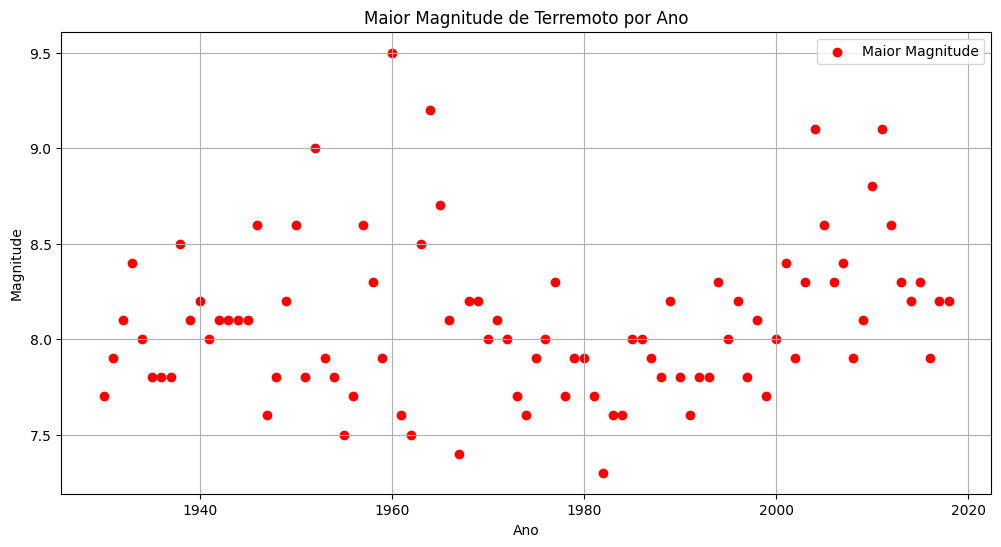

In [12]:


# Encontrar os terremotos com a maior magnitude em cada ano
terremotos_com_maior_magnitude = df.groupby('ano')['mag'].max().reset_index()

# Criar um gráfico de dispersão com todos os anos no eixo x e a magnitude dos terremotos no eixo y
plt.figure(figsize=(12, 6))
plt.scatter(terremotos_com_maior_magnitude['ano'], terremotos_com_maior_magnitude['mag'], color='red', label='Maior Magnitude')
plt.xlabel('Ano')
plt.ylabel('Magnitude')
plt.title('Maior Magnitude de Terremoto por Ano')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Encontrar o ano com o maior número de terremotos
ano_com_mais_terremotos = df['ano'].value_counts().idxmax()

# Filtre os dados para incluir apenas os terremotos desse ano
terremotos_no_ano_com_mais = df[df['ano'] == ano_com_mais_terremotos]

# Filtre os terremotos com profundidade inferior a 100 metros e encontre os terremotos com a maior magnitude
terremotos_com_maior_mag_e_profundidade = terremotos_no_ano_com_mais[terremotos_no_ano_com_mais['depth'] < 100].sort_values(by='mag', ascending=False)

# Imprimir os terremotos com maior magnitude e profundidade inferior a 100 metros no ano com mais terremotos
print(f"Ano com mais terremotos: {ano_com_mais_terremotos}")
print("Terremotos com maior magnitude e profundidade inferior a 100 metros:")
print(terremotos_com_maior_mag_e_profundidade)

Ano com mais terremotos: 2018
Terremotos com maior magnitude e profundidade inferior a 100 metros:
                                   time   latitude   longitude  depth  mag  \
762584 2018-01-23 09:31:40.890000+00:00  56.003900 -149.165800  14.06  7.9   
789867 2018-12-05 04:18:08.400000+00:00 -21.956800  169.417900  10.00  7.5   
763364 2018-01-10 02:51:33.290000+00:00  17.482500  -83.520000  19.00  7.5   
795012 2018-09-28 10:02:45.250000+00:00  -0.255900  119.846200  20.00  7.5   
758669 2018-02-25 17:44:44.140000+00:00  -6.069900  142.753600  25.21  7.5   
...                                 ...        ...         ...    ...  ...   
780664 2018-07-26 14:10:51.750000+00:00  19.414167 -155.291336   0.96  2.5   
794146 2018-10-09 15:39:29.857000+00:00  69.448800 -144.050800   4.60  2.5   
789411 2018-12-10 01:58:38.857000+00:00  61.368300 -150.088200  19.70  2.5   
789413 2018-12-10 00:44:37.753000+00:00  61.392300 -150.084000  24.10  2.5   
788627 2018-12-27 06:01:00.474000+00:00  59

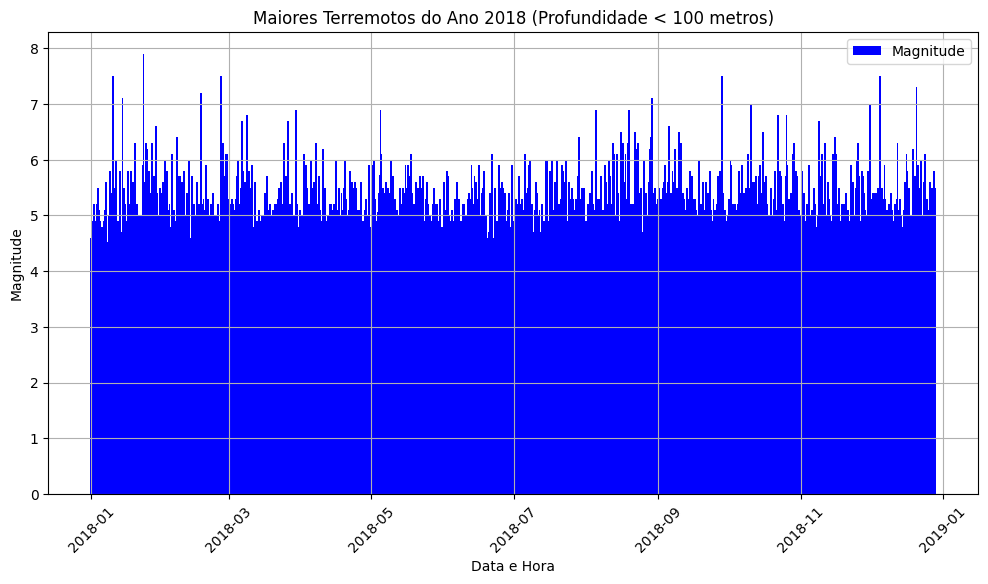

In [15]:
# Encontrar o ano com o maior número de terremotos
ano_com_mais_terremotos = df['ano'].value_counts().idxmax()

# Filtre os dados para incluir apenas os terremotos desse ano
terremotos_no_ano_com_mais = df[df['ano'] == ano_com_mais_terremotos]

# Filtre os terremotos com profundidade inferior a 100 metros e encontre os terremotos com a maior magnitude
terremotos_com_maior_mag_e_profundidade = terremotos_no_ano_com_mais[terremotos_no_ano_com_mais['depth'] < 100].sort_values(by='mag', ascending=False)

# Criar um gráfico de barras com os terremotos do ano com mais terremotos
plt.figure(figsize=(12, 6))
plt.bar(terremotos_com_maior_mag_e_profundidade['time'], terremotos_com_maior_mag_e_profundidade['mag'], color='blue', label='Magnitude')
plt.xlabel('Data e Hora')
plt.ylabel('Magnitude')
plt.title(f"Maiores Terremotos do Ano {ano_com_mais_terremotos} (Profundidade < 100 metros)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()